Total rows loaded: 930
Columns found: ['Дата початку періоду', 'Дата закінчення періоду', 'date', 'Код ЄДРПОУ', 'Назва ОСР', 'Компонент', 'organizationName', 'Підтип споживачів', 'quantity']
First few rows of quantity:
0     9.96
1   237.84
2   418.90
3   959.90
4   993.20
Name: quantity, dtype: float64
Data types: Дата початку періоду       datetime64[ns]
Дата закінчення періоду    datetime64[ns]
date                                int64
Код ЄДРПОУ                          int64
Назва ОСР                          object
Компонент                          object
organizationName                   object
Підтип споживачів                  object
quantity                          float64
dtype: object
Column 'date' is numeric. Interpreting as year.
Valid entries: 929 out of 930
Initial missing values:
Дата початку періоду         0
Дата закінчення періоду      0
date                         0
Код ЄДРПОУ                   0
Назва ОСР                    0
Компонент                    5
org

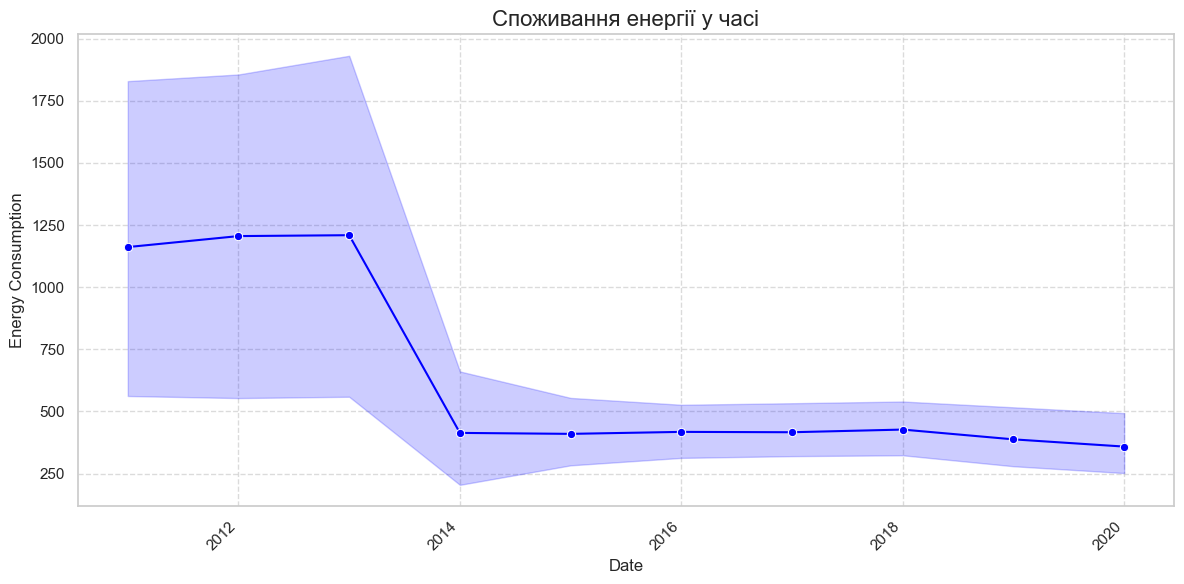

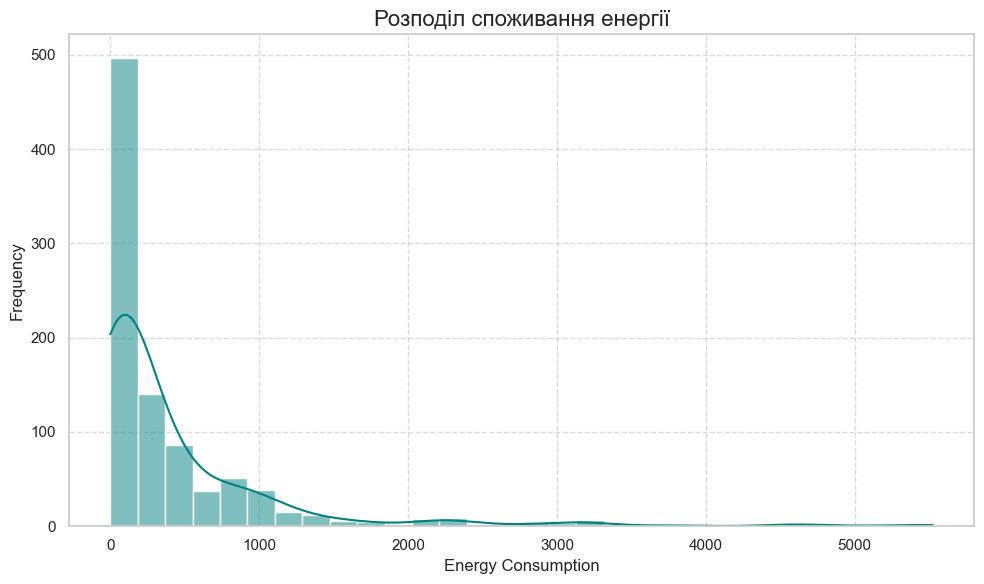

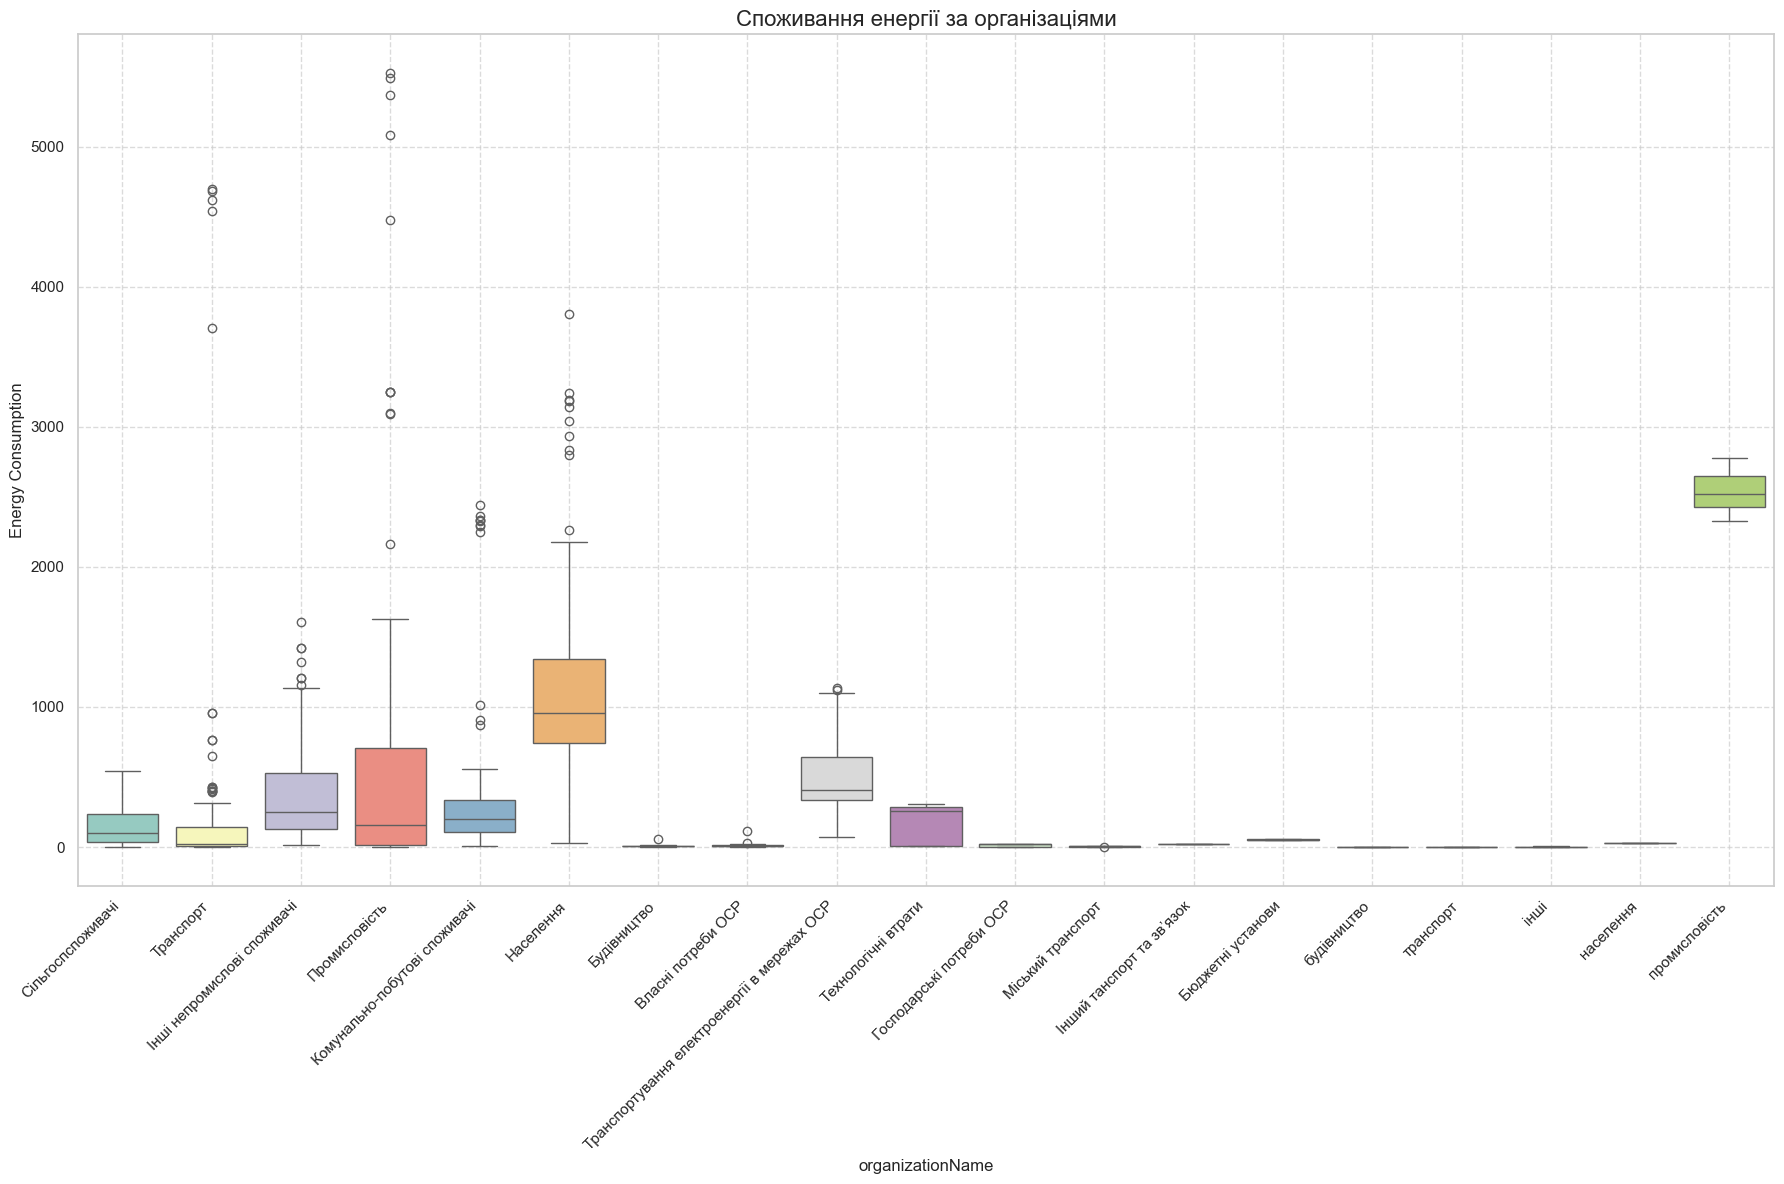

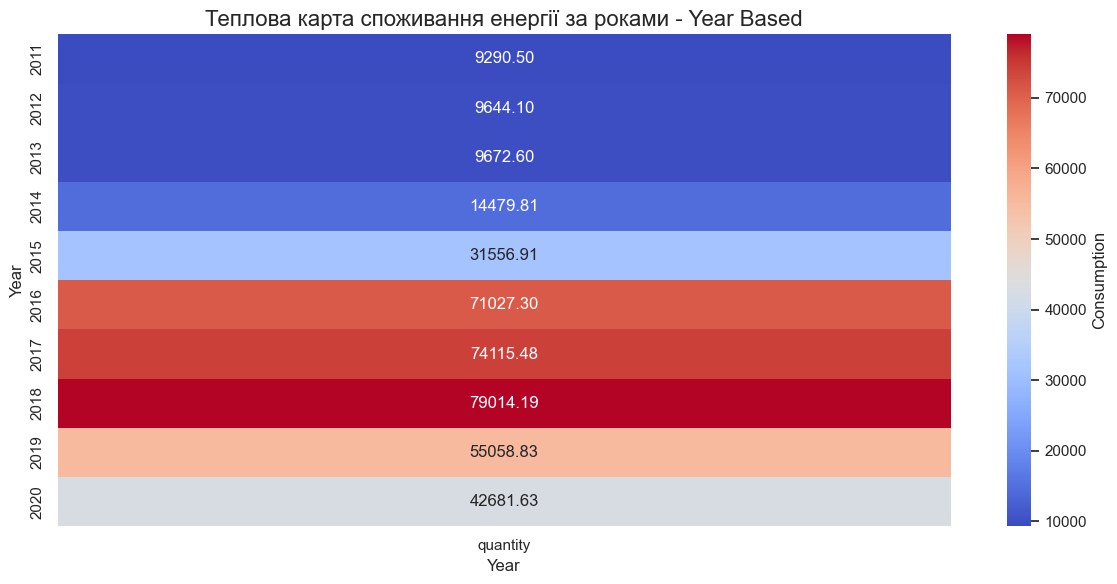


Тренувальні дані (перші 5 рядків):
  Дата початку періоду Дата закінчення періоду  date  Код ЄДРПОУ  \
0           2011-01-01              2011-12-31  2011    41946011   
1           2011-01-01              2011-12-31  2011    41946011   
2           2011-01-01              2011-12-31  2011    41946011   
3           2011-01-01              2011-12-31  2011    41946011   
4           2011-01-01              2011-12-31  2011    41946011   

                            Назва ОСР              Компонент  \
0  ПРАТ "ДТЕК Київські електромережі"       Споживання нетто   
1  ПРАТ "ДТЕК Київські електромережі"       Споживання нетто   
2  ПРАТ "ДТЕК Київські електромережі"       Споживання нетто   
3  ПРАТ "ДТЕК Київські електромережі"  Витрати ОСР та втрати   
4  ПРАТ "ДТЕК Київські електромережі"       Споживання нетто   

              organizationName Підтип споживачів  quantity  
0            Сільгоспспоживачі      Металургійна      9.96  
1            Сільгоспспоживачі      Металургійна

C:\Users\ThinkBook\Desktop\СА-32\СМП\energy_analysis\energy_analysis\forecaster.py:206: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  is_yearly = isinstance(data.index, pd.PeriodIndex) and data.index.freq == 'Y'
c:\Users\ThinkBook\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [3]:
from energy_analysis import (
    DataProcessor,
    EnergyAnalyzer,
    EnergyVisualizer,
    EnergyForecaster
)

processor = DataProcessor()

data = processor.load_data(
    file_path='C:\\Users\\ThinkBook\\Desktop\\СА-32\\СМП\\energy_analysis\\2020_12_31_uk_dso_consumption.xlsx',
    date_column='date', 
    consumption_column='quantity'  
)

cleaned_data = processor.clean_data(
    data=data,
    handle_missing='interpolate'
)

is_valid = processor.validate_data(data=cleaned_data)

print("Чи валідні дані:", is_valid)
print("Очищені дані (перші 5 рядків):")
print(cleaned_data.head())

analyzer = EnergyAnalyzer()

stats = analyzer.calculate_basic_stats(cleaned_data, consumption_column='quantity')

print("Базові статистики:")
for key, value in stats.items():
    print(f"{key}: {value}")

patterns = analyzer.detect_patterns(cleaned_data, consumption_column='quantity', date_column='date')

print("\nВиявлені паттерни:")
for key, pattern in patterns.items():
    print(f"\n{key}:")
    print(pattern)

visualizer = EnergyVisualizer()

visualizer.load_data(cleaned_data)

visualizer.plot_time_series(
    date_column='date',
    consumption_column='quantity',
    title='Споживання енергії у часі'
)

visualizer.plot_histogram(
    consumption_column='quantity',
    bins=30,
    title='Розподіл споживання енергії'
)

visualizer.plot_boxplot(
    consumption_column='quantity',
    category_column='organizationName',
    title='Споживання енергії за організаціями'
)

visualizer.plot_heatmap(
    date_column='date',  
    consumption_column='quantity',
    aggfunc='sum', 
    title='Теплова карта споживання енергії за роками'
)

forecaster = EnergyForecaster()

train_data, test_data = forecaster.prepare_data(
    data=cleaned_data,
    target_column='quantity',
    test_size=0.2  
)

print("\nТренувальні дані (перші 5 рядків):")
print(train_data.head())
print("\nТестові дані (перші 5 рядків):")
print(test_data.head())

time_series = forecaster.preprocess_raw_data(
    data=cleaned_data,
    date_column='date',
    value_column='quantity'
)

print("\nОброблені дані часового ряду:")
print(time_series.head(10))

time_series = forecaster.preprocess_raw_data(
    data=cleaned_data,
    date_column='date',
    value_column='quantity'
)

forecast = forecaster.forecast_consumption(
    data=time_series,
    periods=5, 
    method='holt-winters',  
    seasonal_periods=1 
)

print("\nПрогноз споживання енергії на наступні 5 років:")
print(forecast)


Total rows loaded: 4450
Columns found: ['id', 'date', 'organizationName', 'organizationID', 'providerName', 'providerID', 'meterNumber', 'type', 'quantity', 'unitName']
First few rows of quantity:
0    1043,41
1    2673,21
2    1649,65
3    3059,67
4    5321,19
Name: quantity, dtype: object
Data types: id                    int64
date                 object
organizationName     object
organizationID        int64
providerName         object
providerID            int64
meterNumber         float64
type                 object
quantity             object
unitName             object
dtype: object
Column 'date' is non-numeric. Interpreting as datetime.
Valid entries: 2014 out of 4450
Initial missing values:
id                     0
date                   0
organizationName       0
organizationID         0
providerName           0
providerID             0
meterNumber         4450
type                   0
quantity            2436
unitName               0
dtype: int64
Final missing values:
id   

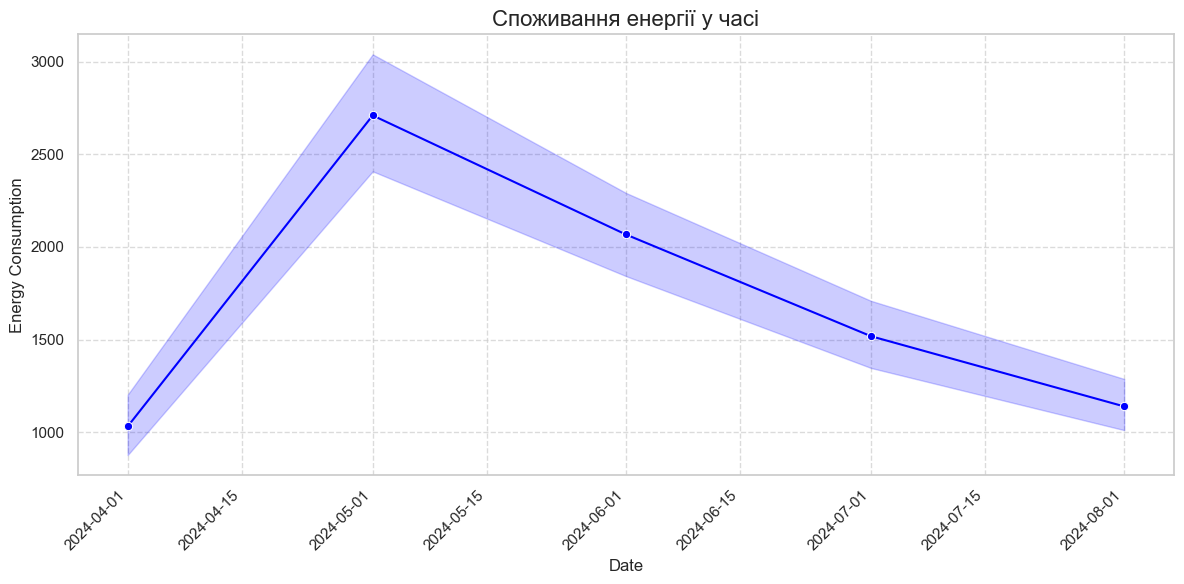

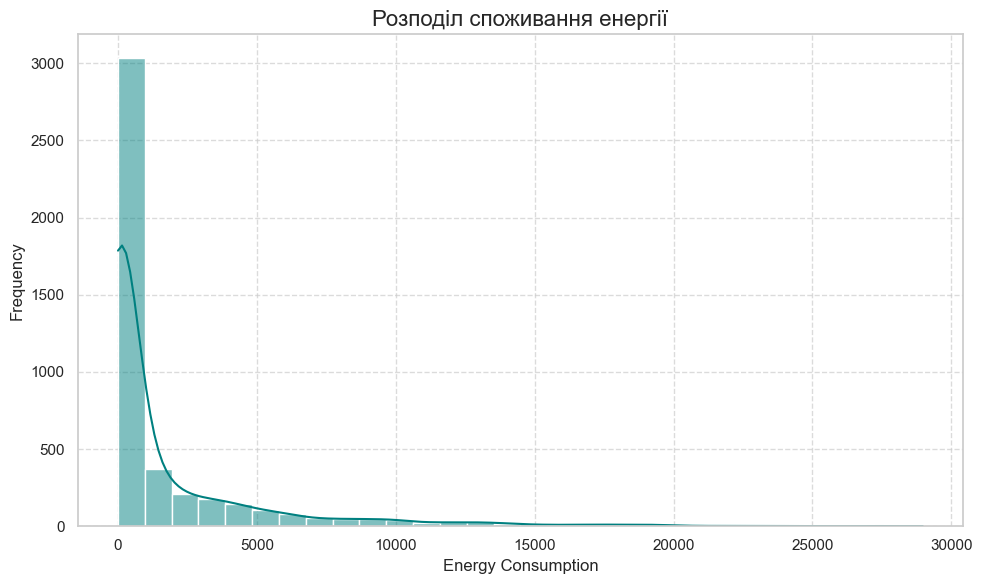

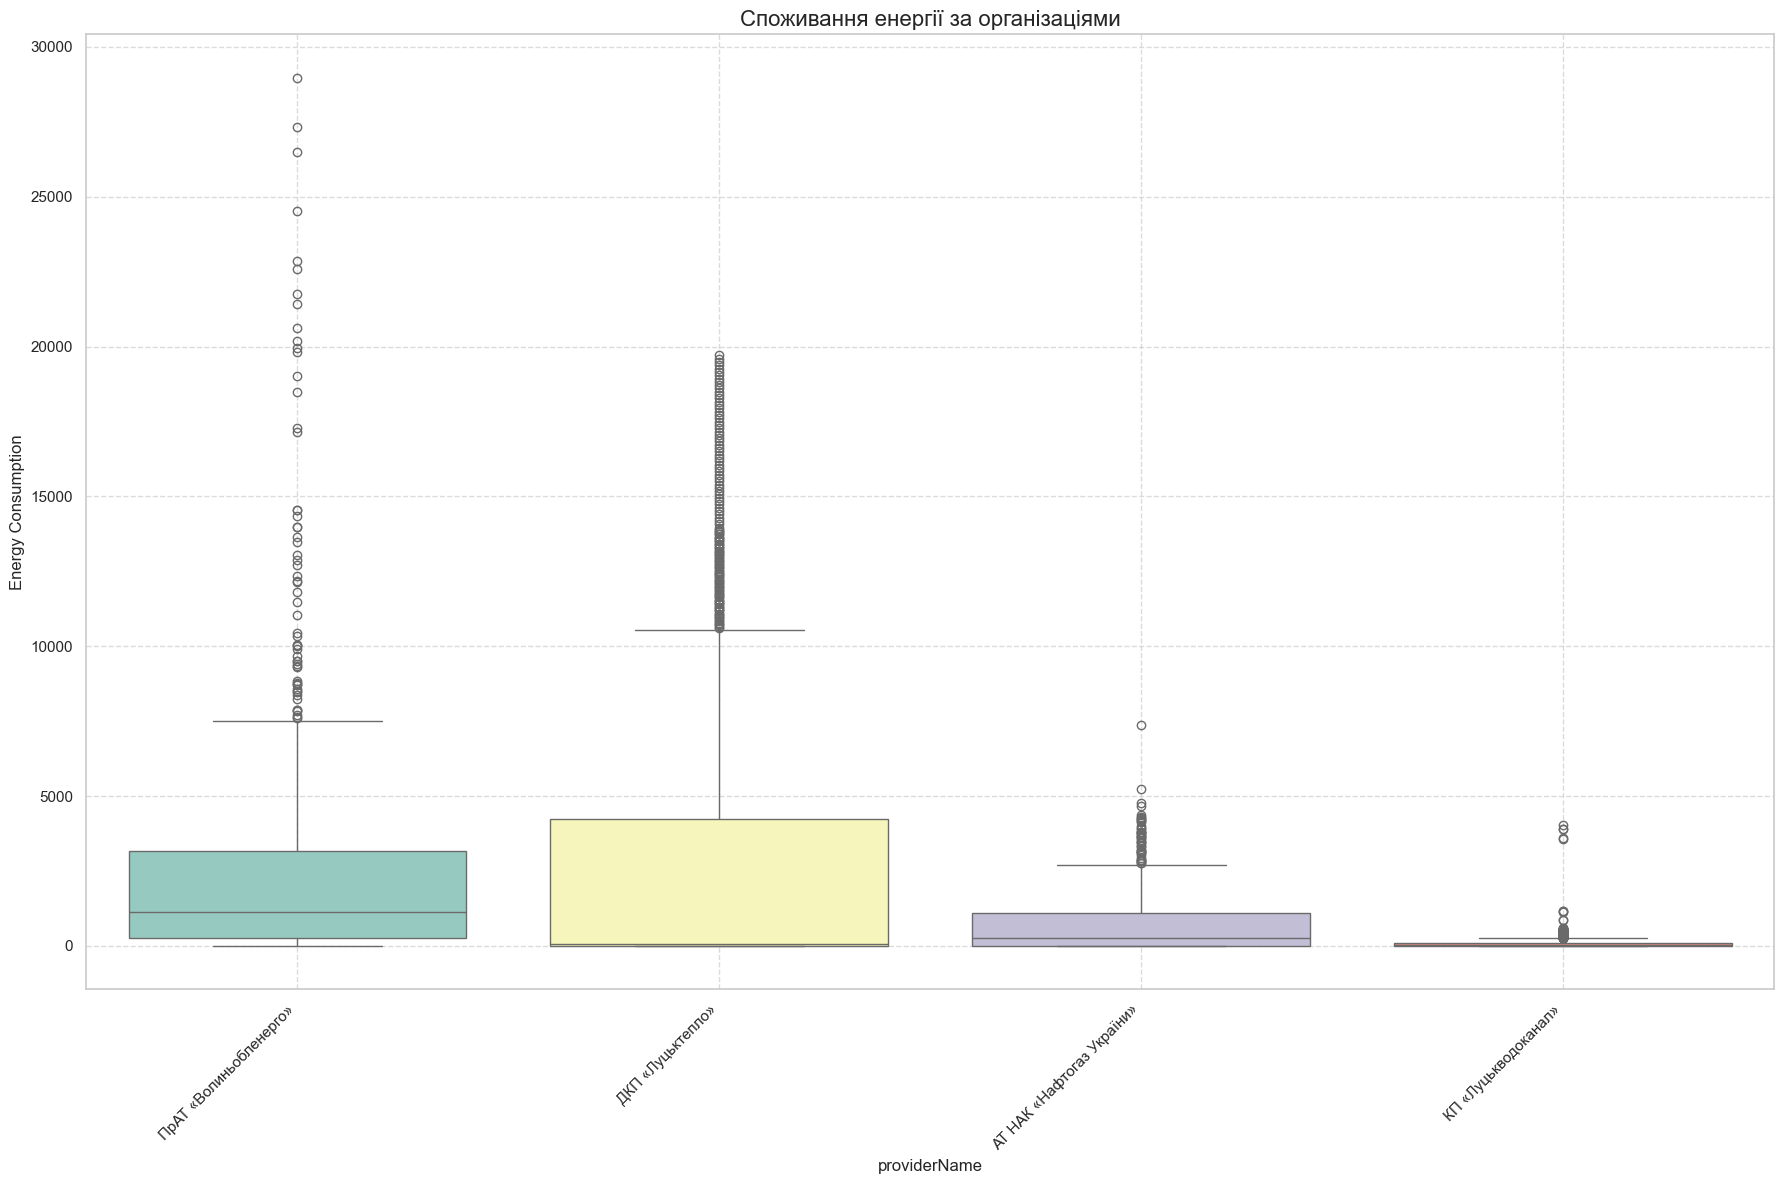

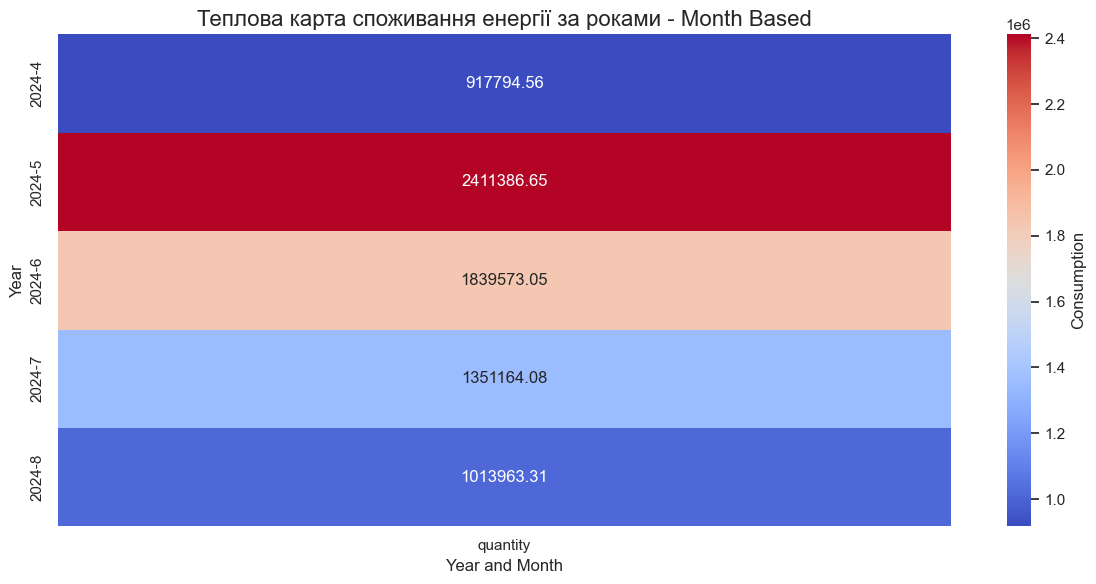


Тренувальні дані (перші 5 рядків):
    id       date        organizationName  organizationID  \
0    1 2024-04-01                ЗДО № 15        25085799   
1  588 2024-04-01  ЗЗСО № 34 (Княгининок)        14523348   
2  589 2024-04-01         Будинок вчителя        41150835   
3  590 2024-04-01              ЗЗСО № 28         21733534   
4  591 2024-04-01               ЗЗСО № 18        13369043   

             providerName  providerID  meterNumber            type  quantity  \
0  ПрАТ «Волиньобленерго»      131512          NaN  Електроенергія   1043.41   
1     КП «Луцькводоканал»     3339489          NaN    Холодна вода     28.81   
2     КП «Луцькводоканал»     3339489          NaN    Холодна вода     10.78   
3     КП «Луцькводоканал»     3339489          NaN    Холодна вода    220.19   
4     КП «Луцькводоканал»     3339489          NaN    Холодна вода     98.71   

  unitName  
0  кВт.год  
1       м3  
2       м3  
3       м3  
4       м3  

Тестові дані (перші 5 рядків):
      

c:\Users\ThinkBook\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\ThinkBook\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [4]:
processor = DataProcessor()

data = processor.load_data(
    file_path='C:\\Users\\ThinkBook\\Desktop\\СА-32\\СМП\\energy_analysis\\resources_04-08.2024_1_.xlsx',
    date_column='date',  
    consumption_column='quantity'  
)

cleaned_data = processor.clean_data(
    data=data,
    handle_missing='interpolate'
)

is_valid = processor.validate_data(data=cleaned_data)

print("Чи валідні дані:", is_valid)
print("Очищені дані (перші 5 рядків):")
print(cleaned_data.head())

analyzer = EnergyAnalyzer()

stats = analyzer.calculate_basic_stats(cleaned_data, consumption_column='quantity')

print("Базові статистики:")
for key, value in stats.items():
    print(f"{key}: {value}")

patterns = analyzer.detect_patterns(cleaned_data, consumption_column='quantity', date_column='date')

print("\nВиявлені паттерни:")
for key, pattern in patterns.items():
    print(f"\n{key}:")
    print(pattern)

visualizer = EnergyVisualizer()

visualizer.load_data(cleaned_data)

visualizer.plot_time_series(
    date_column='date',
    consumption_column='quantity',
    title='Споживання енергії у часі'
)

visualizer.plot_histogram(
    consumption_column='quantity',
    bins=30,
    title='Розподіл споживання енергії'
)

visualizer.plot_boxplot(
    consumption_column='quantity',
    category_column='providerName',
    title='Споживання енергії за організаціями'
)

visualizer.plot_heatmap(
    date_column='date',  
    consumption_column='quantity',
    aggfunc='sum', 
    title='Теплова карта споживання енергії за роками'
)

forecaster = EnergyForecaster()

train_data, test_data = forecaster.prepare_data(
    data=cleaned_data,
    target_column='quantity',
    test_size=0.2  
)

print("\nТренувальні дані (перші 5 рядків):")
print(train_data.head())
print("\nТестові дані (перші 5 рядків):")
print(test_data.head())

time_series = forecaster.preprocess_raw_data(
    data=cleaned_data,
    date_column='date',
    value_column='quantity'
)

print("\nОброблені дані часового ряду:")
print(time_series.head())

forecast_monthly = forecaster.forecast_consumption(
    data=time_series,  
    periods=5,  
    method='holt-winters', 
    seasonal_periods=2  
)

print("\nПрогноз споживання на наступні 5 місяців:")
print(forecast_monthly)